# SC19B081

You will next test your implementation by applying clustering to segment 
and recolor an image. Write your code in a script segment.ipynb . 
1. [5 pts] Download the following images: panda, cardinal. Load 
them in python using image reading function. This will return a 
HxWx3 matrix per image, where H and W denote height and width, 
and the image has three channels (R, G, B). Convert the image to 
double format. To avoid a long run of your code, downsample the 
images (reduce their size) e.g. using image resize(im, [100 
100])function.
2. [5 pts] To perform segmentation, you need a representation for every 
image pixel. We will use a three-dimensional feature representation 
for each pixel, consisting of the R, G and B values of each pixel. Use 
im = reshape(im, H*W, 3); to convert the 3D matrix into a 
2D matrix with pixels as the rows and channels (features) as the 
columns. Use the random restarts function you wrote above, to 
perform clustering over the pixels of the image.
3. [5 pts] Then recolor the pixels of each image according to their 
cluster membership. In particular, replace each pixel with the average 
R, G, B values for the cluster to which the pixel belongs (i.e. recolor 
using the cluster means). Show the recolored image using imshow, 
but convert it to format uint8 before displaying.
4. [5 pts] Experiment with at least five different combinations of 
settings for K, iters, R. Write a brief report (report.pdf or 
report.docx) documenting your findings about these, and 
include the image results inside the document

In [80]:
import numpy as np
from PIL import Image
#import matplotlib.pyplot as plt

In [104]:
panda = Image.open('panda.jpg')
cardinal = Image.open('cardinal.jpg') 


In [105]:
panda = panda.resize([100,100])
cardinal = cardinal.resize([100,100])

In [107]:
cardinal.show()


In [83]:
panda = np.reshape(panda,[10000,3])
cardinal = np.reshape(cardinal,[10000,3])


In [84]:
def pdist2(ref,samples):
    
    K,D1 = ref.shape
    N,D2 = samples.shape
    assert D1==D2, 'Dimensions of reference and samples dont match' 
    dist = np.zeros([K,N])
    for i in range(K):
        for j in range(N):
            dist[i,j] = np.linalg.norm(ref[i,:] - samples[j,:])
    
    return dist
def k_means(A, K, iters):

    N,D = A.shape
    A_max = np.max(A,axis=0)
    A_min = np.min(A,axis=0)
    cluster_center = A_min + (A_max-A_min)*np.random.rand(K,D)
    distances = np.zeros([K,N])
    for i in range(iters):
        distances = pdist2(cluster_center,A)
        cluster_id = np.argmin(distances,axis=0)
        classifying_matrix = np.zeros([N,D,K])
        id_count = np.zeros(K,dtype=int)
        for i,id in enumerate(cluster_id):
            #print(i,id)
            id_count[id] += 1
            #print(id_count[id])
            classifying_matrix[id_count[id]-1,:,id] = A[i,:]
        for i in range(K):
            cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]
    
    ssd = np.sum((pdist2(cluster_center,A))**2)
     
    return cluster_id,cluster_center,ssd
def wrapper_kmeans(A,K,iters,R):
    ssd_old = np.inf
    for i in range(R):
        cluster_id,cluster_center,ssd_new = k_means(A,K,iters)
        if (ssd_new < ssd_old):
            cluster_id_best = cluster_id
            cluster_center_best = cluster_center
            ssd_old = ssd_new
    
    return cluster_id_best,cluster_center_best,ssd_old

In [85]:
cluster_id_panda,cluster_center_panda,ssd_panda = wrapper_kmeans(panda,2,100,4)

C:\Users\udupa\AppData\Local\Temp\ipykernel_16424\3102181842.py:30: RuntimeWarning: invalid value encountered in divide
  cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]


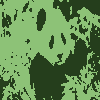

In [86]:
new_panda = panda.copy()
for i in range(10000):
    if(cluster_id_panda[i] == 0):
        new_panda[i,:] = cluster_center_panda[0,:]
    if(cluster_id_panda[i] == 1):
        new_panda[i,:] = cluster_center_panda[1,:]
new_panda = np.reshape(new_panda,[100,100,3])
Image.fromarray(new_panda)

In [87]:
cluster_id_panda,cluster_center_panda,ssd_panda = wrapper_kmeans(panda,3,100,4)

C:\Users\udupa\AppData\Local\Temp\ipykernel_16424\3102181842.py:30: RuntimeWarning: invalid value encountered in divide
  cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]


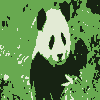

In [88]:
new_panda = panda.copy()
for i in range(10000):
    if(cluster_id_panda[i] == 0):
        new_panda[i,:] = cluster_center_panda[0,:]
    if(cluster_id_panda[i] == 1):
        new_panda[i,:] = cluster_center_panda[1,:]
    if(cluster_id_panda[i] == 2):
        new_panda[i,:] = cluster_center_panda[2,:]
new_panda = np.reshape(new_panda,[100,100,3])
Image.fromarray(new_panda)

In [89]:
cluster_id_panda,cluster_center_panda,ssd_panda = wrapper_kmeans(panda,4,100,4)

C:\Users\udupa\AppData\Local\Temp\ipykernel_16424\3102181842.py:30: RuntimeWarning: invalid value encountered in divide
  cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]


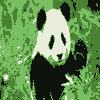

In [90]:
new_panda = panda.copy()
for i in range(10000):
    if(cluster_id_panda[i] == 0):
        new_panda[i,:] = cluster_center_panda[0,:]
    if(cluster_id_panda[i] == 1):
        new_panda[i,:] = cluster_center_panda[1,:]
    if(cluster_id_panda[i] == 2):
        new_panda[i,:] = cluster_center_panda[2,:]
    if(cluster_id_panda[i] == 3):
        new_panda[i,:] = cluster_center_panda[3,:]
new_panda = np.reshape(new_panda,[100,100,3])
Image.fromarray(new_panda)

In [91]:
cluster_id_panda,cluster_center_panda,ssd_panda = wrapper_kmeans(panda,5,100,4)

C:\Users\udupa\AppData\Local\Temp\ipykernel_16424\3102181842.py:30: RuntimeWarning: invalid value encountered in divide
  cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]


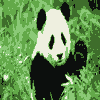

In [92]:
new_panda = panda.copy()
for i in range(10000):
    if(cluster_id_panda[i] == 0):
        new_panda[i,:] = cluster_center_panda[0,:]
    if(cluster_id_panda[i] == 1):
        new_panda[i,:] = cluster_center_panda[1,:]
    if(cluster_id_panda[i] == 2):
        new_panda[i,:] = cluster_center_panda[2,:]
    if(cluster_id_panda[i] == 3):
        new_panda[i,:] = cluster_center_panda[3,:]
    if(cluster_id_panda[i] == 4):
        new_panda[i,:] = cluster_center_panda[4,:]
new_panda = np.reshape(new_panda,[100,100,3])
Image.fromarray(new_panda)

In [93]:
cluster_id_cardinal,cluster_center_cardinal,ssd_cardinal = wrapper_kmeans(cardinal,2,100,4)

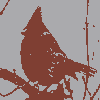

In [94]:
new_cardinal = cardinal.copy()
for i in range(10000):
    if(cluster_id_cardinal[i] == 0):
        new_cardinal[i,:] = cluster_center_cardinal[0,:]
    if(cluster_id_cardinal[i] == 1):
        new_cardinal[i,:] = cluster_center_cardinal[1,:]
new_cardinal = np.reshape(new_cardinal,[100,100,3])
Image.fromarray(new_cardinal)

In [95]:
cluster_id_cardinal,cluster_center_cardinal,ssd_cardinal = wrapper_kmeans(cardinal,3,100,4)

C:\Users\udupa\AppData\Local\Temp\ipykernel_16424\3102181842.py:30: RuntimeWarning: invalid value encountered in divide
  cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]


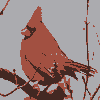

In [96]:
new_cardinal = cardinal.copy()
for i in range(10000):
    if(cluster_id_cardinal[i] == 0):
        new_cardinal[i,:] = cluster_center_cardinal[0,:]
    if(cluster_id_cardinal[i] == 1):
        new_cardinal[i,:] = cluster_center_cardinal[1,:]
    if(cluster_id_cardinal[i] == 2):
        new_cardinal[i,:] = cluster_center_cardinal[2,:]
new_cardinal = np.reshape(new_cardinal,[100,100,3])
Image.fromarray(new_cardinal)

In [97]:
cluster_id_cardinal,cluster_center_cardinal,ssd_cardinal = wrapper_kmeans(cardinal,4,100,4)

C:\Users\udupa\AppData\Local\Temp\ipykernel_16424\3102181842.py:30: RuntimeWarning: invalid value encountered in divide
  cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]


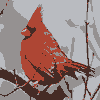

In [98]:
new_cardinal = cardinal.copy()
for i in range(10000):
    if(cluster_id_cardinal[i] == 0):
        new_cardinal[i,:] = cluster_center_cardinal[0,:]
    if(cluster_id_cardinal[i] == 1):
        new_cardinal[i,:] = cluster_center_cardinal[1,:]
    if(cluster_id_cardinal[i] == 2):
        new_cardinal[i,:] = cluster_center_cardinal[2,:]
    if(cluster_id_cardinal[i] == 3):
        new_cardinal[i,:] = cluster_center_cardinal[3,:]
new_cardinal = np.reshape(new_cardinal,[100,100,3])
Image.fromarray(new_cardinal)

In [99]:
cluster_id_cardinal,cluster_center_cardinal,ssd_cardinal = wrapper_kmeans(cardinal,5,100,4)

C:\Users\udupa\AppData\Local\Temp\ipykernel_16424\3102181842.py:30: RuntimeWarning: invalid value encountered in divide
  cluster_center[i,:] = np.sum(classifying_matrix[:,:,i],axis=0)/id_count[i]


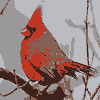

In [100]:
new_cardinal = cardinal.copy()
for i in range(10000):
    if(cluster_id_cardinal[i] == 0):
        new_cardinal[i,:] = cluster_center_cardinal[0,:]
    if(cluster_id_cardinal[i] == 1):
        new_cardinal[i,:] = cluster_center_cardinal[1,:]
    if(cluster_id_cardinal[i] == 2):
        new_cardinal[i,:] = cluster_center_cardinal[2,:]
    if(cluster_id_cardinal[i] == 3):
        new_cardinal[i,:] = cluster_center_cardinal[3,:]
    if(cluster_id_cardinal[i] == 4):
        new_cardinal[i,:] = cluster_center_cardinal[4,:]
new_cardinal = np.reshape(new_cardinal,[100,100,3])
Image.fromarray(new_cardinal)